<h1 align=center><font size = 5>PNEUMONIA PREDICTION</h1>

In this lab, we will apply Convolutional Neural Network for Pneumonia prediction. 

The project involves building a CNN model to predict whether a patient has Pneumonia or Normal..

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
      
1. What is Pneumonia   
2. About the data
3. Import Library
4. Generate data paths with labels
5. Preprocessing
6. Create Model Structure
7. Pretrained Model
8. Training The Data
9. Model Evaluation
10. Classification report
11. Result Summary
</font>
</div>

<h2>1. What is Pneumonia?</h2>
Pneumonia is an inflammatory condition of the lung affecting primarily the small air sacs known as alveoli.

- Symptoms typically include some combination of productive or dry cough, chest pain, fever and difficulty breathing.

- The severity of the condition is variable. Pneumonia is usually caused by infection with viruses or bacteria and less commonly by other microorganisms, certain medications or conditions such as autoimmune diseases.

- Risk factors include cystic fibrosis, chronic obstructive pulmonary disease (COPD), asthma, diabetes, heart failure, a history of smoking, a poor ability to cough such as following a stroke and a weak immune system. 

- Diagnosis is often based on symptoms and physical examination. 

- Chest X-ray, blood tests, and culture of the sputum may help confirm the diagnosis.

- The disease may be classified by where it was acquired, such as community- or hospital-acquired or healthcare-associated pneumonia.**

Let's Click on the below image/link for more explanation on pneumonia

[![](https://img.youtube.com/vi/rVL-0KpoqP4/0.jpg)](https://www.youtube.com/watch?v=rVL-0KpoqP4)


So as we have seen in the above video, Pneumonia is an infection that inflames the air sacs in one or both lungs. The air sacs may fill with fluid or pus, which can cause coughing, fever, chills, and difficulty breathing. Organisms, including bacteria, viruses, and fungi can cause pneumonia.

**Signs of potential Pneumonia:**
    The picture below shows the difference in x-ray between a normal lung and a pneumonic lung. 
    - Usually lungs are full of air and does not absorb the X-rays so it appears black, which you can see in the normal image.     - Bones absorb X-rays and appear white. Fluid or tissues show up as grey-ish.

![diff_pneumonia_normal](diff_pneumonia_normal.png)

**Now, let's develop an algorithm to predict if a Patient has Pneumonia or not**

# 2. About Data

**The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).**

**Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.**

**For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.**

**Below is the Purpose and Comments For Importing Each Libraries**

# Data processing, CSV, and image file I/O
- import os  # Importing the os module for operating system functionalities.
- import re  # Importing the re module for regular expression operations.
- import requests  # Importing the requests module for making HTTP requests.
- from PIL import Image  # Importing the Image module from the Python Imaging Library (PIL) for image processing.
- import pandas as pd  # Importing pandas library for data manipulation and analysis.
- import numpy as np  # Importing numpy library for numerical computations.

# Libraries for data visualization
- import seaborn as sns  # Importing seaborn for statistical data visualization.
- import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating static, interactive, and animated visualizations.
- import plotly.express as px  # Importing plotly.express for easy-to-use functions for interactive plotting.
- import plotly.graph_objects as go  # Importing plotly.graph_objects for creating sophisticated visualizations.
- from plotly.subplots import make_subplots  # Importing make_subplots to create subplots.

# Importing deep learning libraries for preprocessing, modeling, and evaluation
- from sklearn.model_selection import train_test_split  # Importing train_test_split from sklearn.model_selection for splitting - data into training and testing sets.
- from sklearn.metrics import classification_report, confusion_matrix  # Importing classification_report and confusion_matrix for evaluating classification models.
- import tensorflow as tf  # Importing TensorFlow for building and training deep learning models.
- from tensorflow.keras import layers  # Importing layers module from TensorFlow.keras for building deep learning models.
- from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense  # Importing specific layers for constructing convolutional neural networks.
- from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau  # Importing callbacks for monitoring and improving deep learning models.
- from tensorflow.keras.preprocessing import image  # Importing image preprocessing utilities from TensorFlow.keras.
- from tensorflow.keras.models import Sequential  # Importing Sequential module for creating sequential deep learning models.
- from tensorflow.keras.optimizers import Adam, Adamax  # Importing Adam and Adamax optimizers for gradient-based optimization.
- from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Importing ImageDataGenerator for real-time data augmentation.

- from tensorflow.keras import regularizers  # Importing regularizers for applying penalties on layer parameters during optimization.
- import warnings  # Importing warnings module to handle warnings.
- warnings.filterwarnings('ignore')  # Suppressing warnings to keep the output clean.


<h3>3. So now let's Import Libraries</h3>

In [1]:
# data processing, CSV & image file I/O
import os
import re
import requests
from PIL import Image
import pandas as pd
import numpy as np

#libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# import Deep learning Libraries
#preprocessing, modeling & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

**Making DataFrame for Train,test,valid dataset respectively**

**For our Train Dataset**

<h3> 4. Generate data paths with labels</h3>

In [2]:
# Generate data paths with labels

train_data_dir = '..\\CNN_PNUEMONIA_DETECTION\\input\\chest_xray\\train'
filepaths = []
labels = []

folds = os.listdir(train_data_dir)
# print(folds)

for fold in folds:
    foldpath = os.path.join(train_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')

train_df = pd.concat([Fseries, Lseries], axis= 1)

In [3]:
#train_df

This code generates a DataFrame containing **file paths** and corresponding **labels** for a machine learning/deep learning task, specifically for a **chest X-ray dataset**. 

**Here's an explanation of each part:**

- **Setting the Directory:** **train_data_dir** is the directory path where the training data is stored. It contains subdirectories, each representing a class label.

- **Initializing Lists:** Two empty lists, **filepaths** and **labels**, are initialized to store the **file paths** and corresponding **labels**, respectively.

- **Listing Subdirectories:** **os.listdir(train_data_dir)** retrieves a list of subdirectories (or folds) within the train_data_dir.

- **Iterating Over Folds:** The code iterates over each fold (subdirectory) obtained from **os.listdir(train_data_dir)**.

- **Iterating Over Files:** Within each fold, the code iterates over each file using **os.listdir(foldpath).**

- **Building File Paths:** For each file, the full file path (fpath) is constructed by joining the fold path (foldpath) with the file name.

- **Appending to Lists:** The file path (fpath) is appended to the filepaths list, and the fold (label) is appended to the labels list.

- **Creating Series:** **Two Pandas Series** are created: **Fseries** containing file paths and **Lseries** containing labels.

- **Concatenating Series:** The **pd.concat()** function concatenates the two series along axis 1 (columns) to form a DataFrame **(train_df)**.

This code efficiently organizes **file paths** and **labels** into a DataFrame, facilitating data management and preprocessing for machine learning/deep learning tasks.






<button class="hideButton" onclick="toggleVisibility('hiddenContent')">Double Click here: To learn more about the functions used below </button>

<div id="hiddenContent" style="display:none">

To learn more about the functions used below: 

kindly click on the below links for more details and examples: 

Sources
- pandas.concat — pandas 2.2.0 documentation: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
- Python | Pandas Merging, Joining, and Concatenating - GeeksforGeeks: https://www.geeksforgeeks.org/python-pandas-merging-joining-and-concatenating/
- Concatenation (Combining Data Tables) in Python and Pandas - Dataquest: https://www.dataquest.io/blog/pandas-concatenation-tutorial/

</div>




**So, let's do thesame for our TEST dataset**

In [4]:
# Generate data paths with labels
#test_data_dir = 'C:\\Users\\focuz\\machine_learning_workshop\\input\\chest_xray\\chest_xray\\test'
test_data_dir = '..\\CNN_PNUEMONIA_DETECTION\\input\\chest_xray\\test'
filepaths = []
labels = []

folds = os.listdir(test_data_dir)
for fold in folds:
    foldpath = os.path.join(test_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
test_df = pd.concat([Fseries, Lseries], axis= 1)

**Val**

In [5]:
# Generate data paths with labels
#val_data_dir = 'C:\\Users\\focuz\\machine_learning_workshop\\input\\chest_xray\\chest_xray\\val'
val_data_dir = '..\\CNN_PNUEMONIA_DETECTION\\input\\chest_xray\\val'
filepaths = []
labels = []
folds = os.listdir(val_data_dir)
for fold in folds:
    foldpath = os.path.join(val_data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
valid_df = pd.concat([Fseries, Lseries], axis= 1)

# 5. Image data preprocessing

In [6]:
# crobed image size
batch_size = 16
img_size = (224, 224)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 660 validated image filenames belonging to 2 classes.
Found 16 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.




We used this code for image data preprocessing and generation in our pipeline, for training, validation, and testing of a deep learning model. Here's a detailed explanation:

Image Data Preparation: The code initializes instances of ImageDataGenerator for training, validation, and testing data (tr_gen, val_gen, ts_gen, respectively). These generators are typically used for data augmentation and preprocessing of image data before feeding it into a neural network model.

**Batch Size:** **batch_size = 16** specifies the number of samples to be used in each training batch. It's a hyperparameter that affects the training process, memory usage, and convergence speed.

**Image Size:** **img_size = (224, 224)** defines the target size to which the input images will be resized. In this case, images are resized to a square shape with dimensions **224x224 pixels**. This is often done to ensure uniformity and compatibility with pre-trained models like those from the ImageNet dataset.

**ImageDataGenerator:** Three instances of ImageDataGenerator are created: **tr_gen** for training data augmentation, **ts_gen** for test data generation, and **val_gen** for validation data generation. These generators are used to apply various transformations and augmentations to the images, such as rotation, scaling, and flipping.
- These generators are typically used for data augmentation and preprocessing of image data before feeding it into a neural network model.

**Flow from DataFrame:** **flow_from_dataframe()** is a method provided by ImageDataGenerator to generate batches of data from DataFrame inputs. It reads images from file paths specified in the DataFrame (train_df, valid_df, test_df) and generates batches of augmented images along with their corresponding labels.

**Parameters:**

  - x_col: Specifies the column in the DataFrame containing the file paths of the images.
  - y_col: Specifies the column containing the labels.
  - target_size: Defines the size to which images will be resized during preprocessing.
  - class_mode: Specifies the type of labels, which is categorical in this case.
  - color_mode: Specifies the color mode of the images, which is RGB.
  - shuffle: Determines whether to shuffle the data before each epoch.
  - batch_size: Specifies the batch size, as defined earlier.
  
 tf.keras.preprocessing.image.ImageDataGenerator | TensorFlow Documentation: 
 - further reading:https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

            


# Samples Of The Data

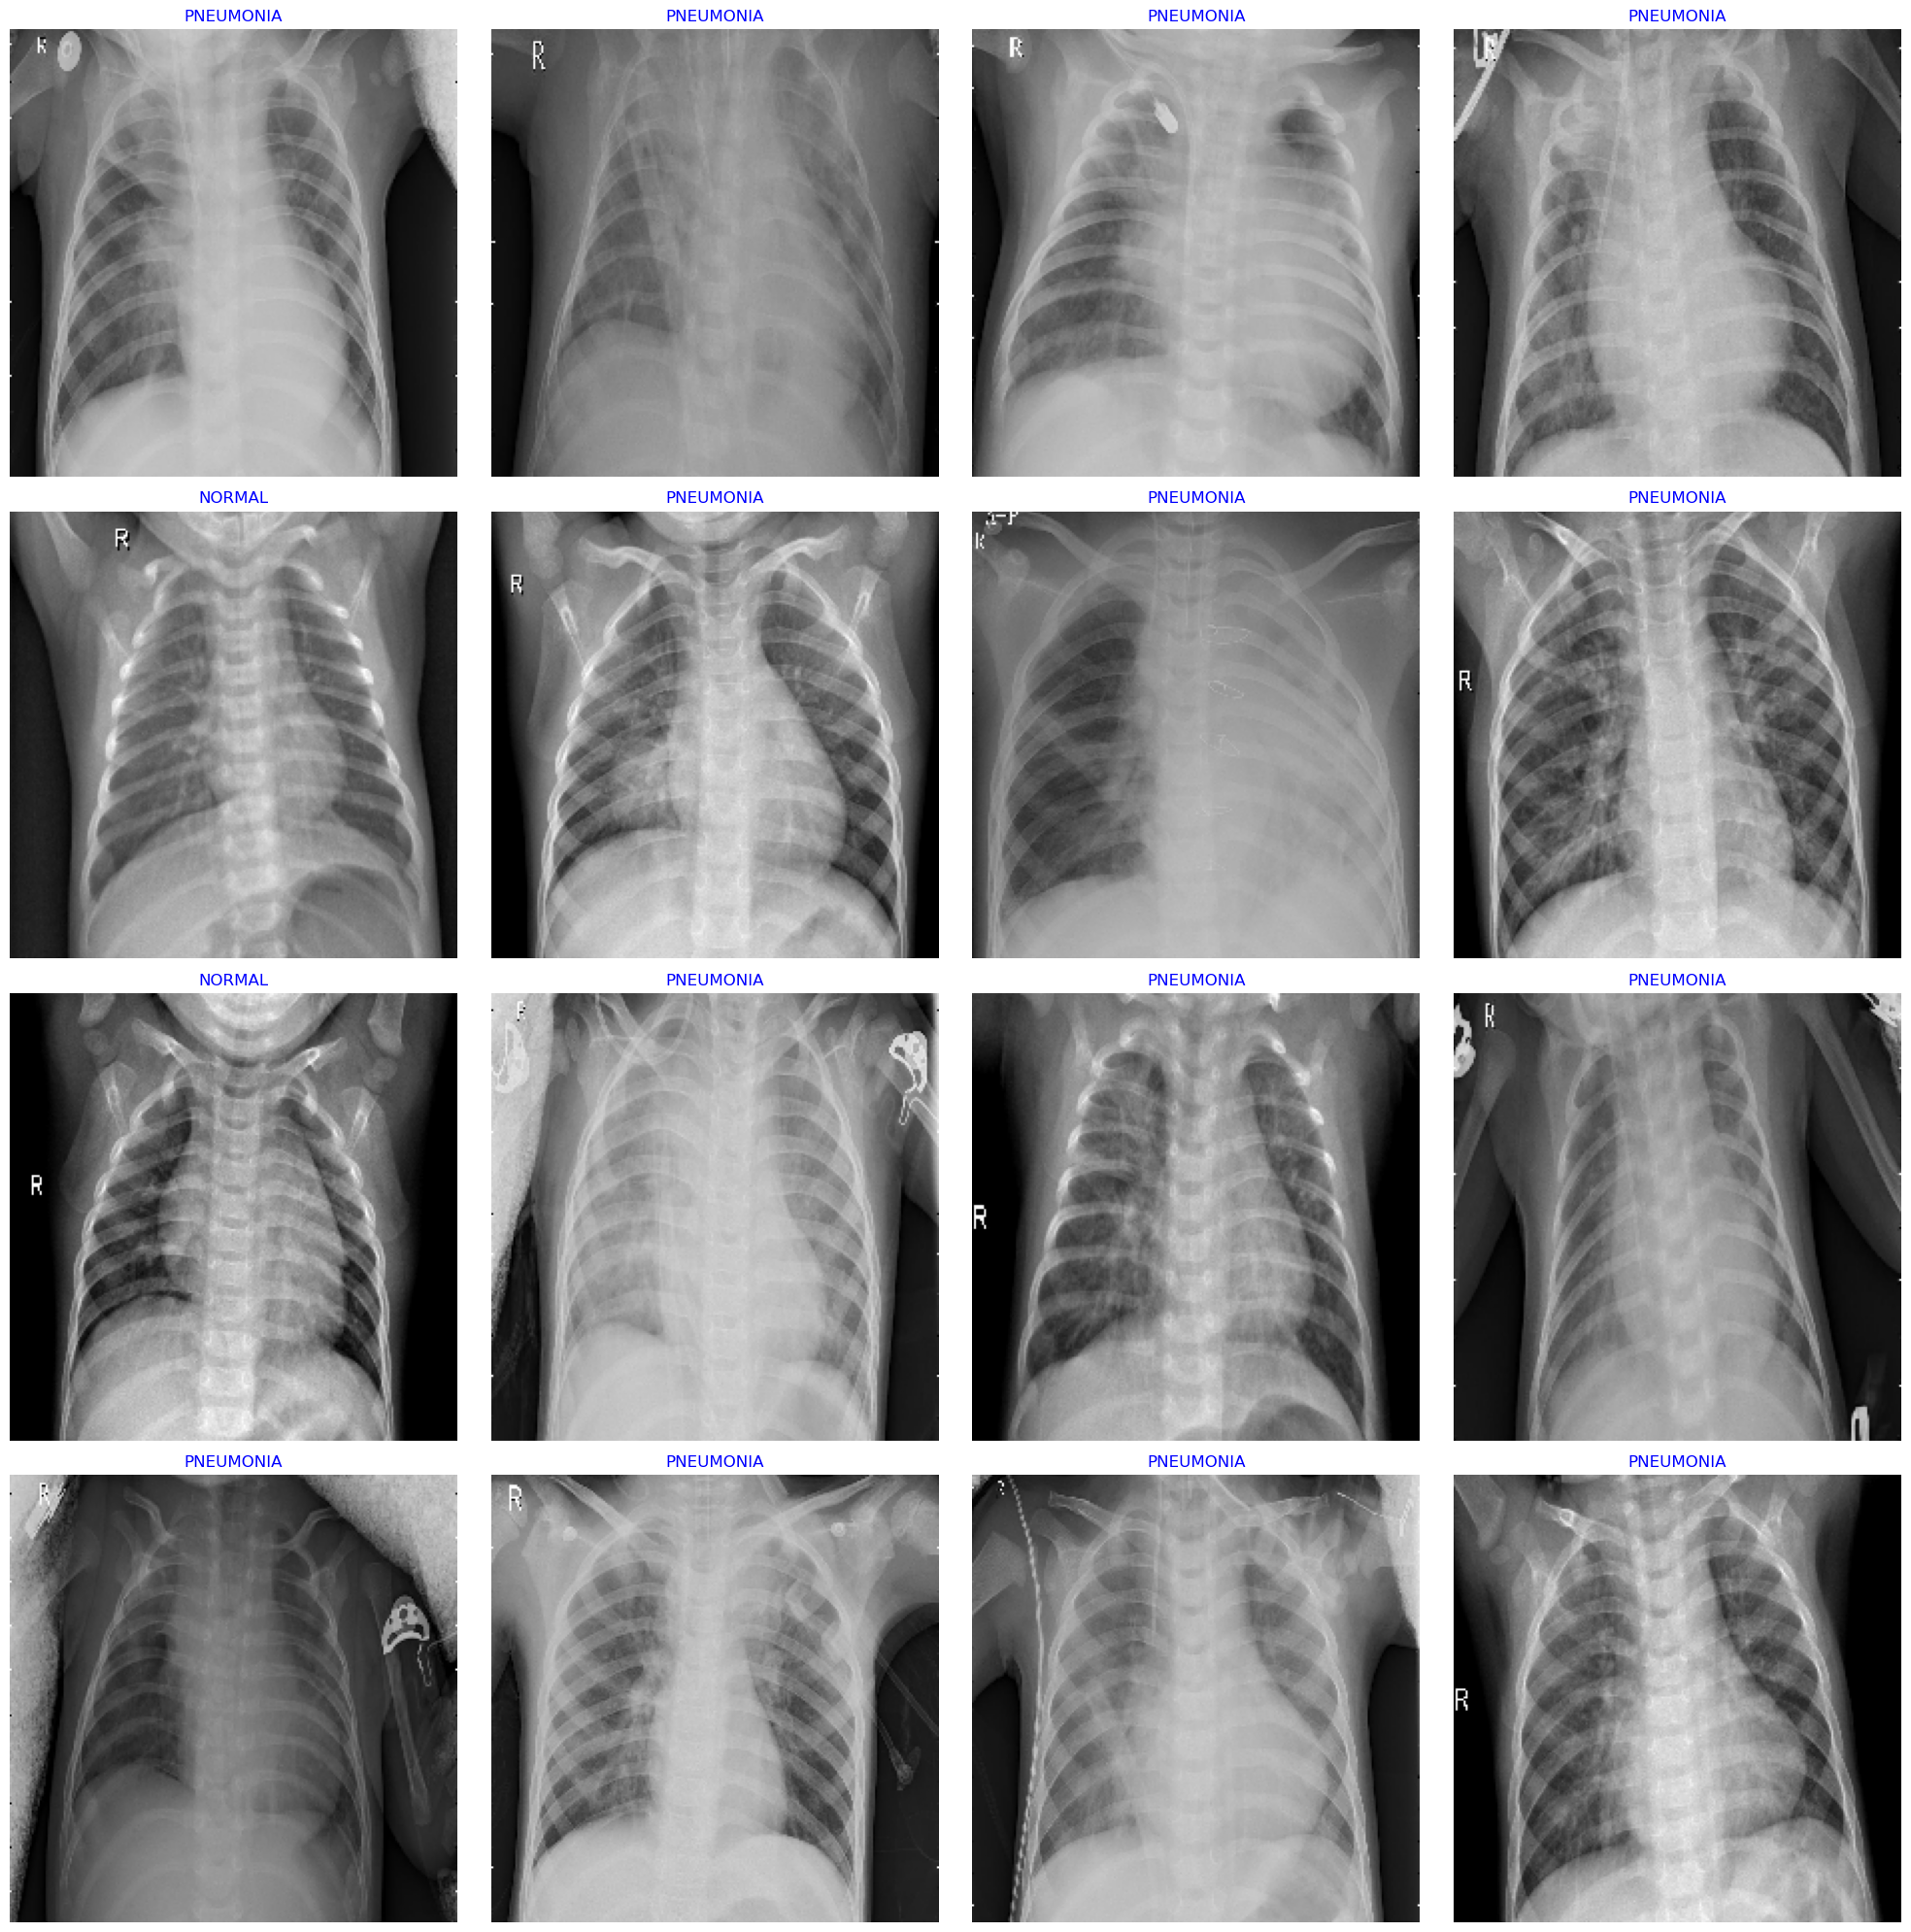

In [7]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.tight_layout()
plt.show()

<button class="hideButton" onclick="toggleVisibility('hiddenContent')">Double Click here: To learn more about the functions used for our sample dataset </button>

<div id="hiddenContent" style="display:none">
    
This code snippet is used for visualizing a batch of images along with their corresponding class labels from a generator (train_gen) in a Jupyter Notebook or any other Python environment that supports visualization. 
Let's break down each part of the code:

1. **g_dict** = **train_gen.class_indices:** This line retrieves the class indices from the generator **train_gen**. It creates a dictionary where the keys are the class names and the values are the corresponding indices.

2. classes = **list(g_dict.keys()):** This line extracts the class names (strings) from the **dictionary g_dict and stores them in a list called classes.

3. images, labels = next(train_gen): This line uses the next() function to retrieve a batch of samples (images and their labels) from the generator train_gen. It's important to note that generators yield batches of data.

4. plt.figure(figsize=(20, 20)): This line creates a new figure for plotting with a specified size.

5. for i in range(16):: This line initiates a loop to iterate over each sample in the batch. The number 16 is used assuming a batch size of 16 images.

6. plt.subplot(4, 4, i + 1): This line creates a subplot for each image in a 4x4 grid. The i + 1 is used to ensure proper indexing since subplot indices start from 1.

7. image = images[i] / 255: This line scales the pixel values of the image to the range [0, 1] by dividing by 255, assuming the original pixel values are in the range [0, 255].

8. plt.imshow(image): This line displays the image using imshow() function from Matplotlib.

9. index = np.argmax(labels[i]): This line finds the index of the maximum value in the label array for the current image, indicating the predicted class.

10. class_name = classes[index]: This line retrieves the class name corresponding to the predicted class index.

11. plt.title(class_name, color='blue', fontsize=12): This line sets the title of the subplot to the predicted class name.

12 plt.axis('off'): This line turns off the axis for the subplot.

13. plt.tight_layout(): This line adjusts the subplot layout to prevent overlapping.

14 plt.show(): This line displays the plot with all the subplots showing the images and their class labels.

**Overall, we used this codes to visualize a batch of images along with their predicted class labels. 
It's useful for understanding the performance of a model during training or validation.**
</div>

# 6. Create Model Structure  

 - The architecture of the model is defined using the Keras API, which is a high-level neural networks API written in Python and capable of running on top of TensorFlow, among other frameworks. Keras provides a user-friendly interface for building and training neural networks, allowing users to easily define and customize their models using modular building blocks such as layers, activation functions, and optimizers. 
- In this code snippet, the Sequential model from Keras is used to create a sequential stack of layers, making it easy to define the CNN architecture for image classification.

In [8]:
from tensorflow.keras.layers import MaxPooling2D
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

model = Sequential([
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dense(64,activation = "relu"),
    Dense(class_count, activation = "softmax")
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

The above codes defines a convolutional neural network (CNN) using the Keras API within TensorFlow.

**Imports:**
**from tensorflow.keras.layers import MaxPooling2D:** Importing the MaxPooling2D layer, which performs max pooling operation for our dataset.

**Model Configuration:**

 - **img_size = (224, 224):** The dimensions of the input images.
 - **channels = 3:** The number of color channels in the images (RGB).
 - **img_shape = (img_size[0], img_size[1], channels):** The shape of the input images.
 - **class_count = len(list(train_gen.class_indices.keys())):** The number of classes in the dataset, inferred from the train_gen    generator.
 
**Model Definition:**

  - **Sequential([...]):** Defines a sequential model, where layers are added sequentially.
  - **Convolutional Layers:**
  - **Multiple Conv2D layers:** These are convolutional layers with specified number of filters, kernel size, padding, and activation function.
  - **Multiple MaxPooling2D layers:** These perform max pooling operation to reduce spatial dimensions.
  - **Flatten Layer:** Flattens the input into a 1D array before feeding it into the dense layers.

**Dense Layers:**
  - **Multiple Dense layers:** Fully connected layers with specified number of neurons and activation functions.
  - The last Dense layer has a number of neurons equal to the number of classes, with a **softmax activation function**, suitable for multi-class classification.

**Model Compilation:**

  - model.compile(...): Compiles the model, specifying the optimizer, loss function, and evaluation metrics.

**Summary:**

  - model.summary(): Prints a summary of the model architecture, including the layer types, output shapes, and number of parameters.


**Basically, the codes defines a CNN architecture for image classification, comprising convolutional and dense layers, and then compiles the model for training**

<h2> 7. LET'S INTRODUCE A PRETRAINED MODEL TO IMPROVE THE PERFORMANCE OF OUR PREDICTION</h2>

 - **Pre-trained models** are neural network architectures that have been trained on large datasets for specific tasks, such as image classification, object detection, or natural language processing. 

 - These models are trained using extensive computational resources and vast amounts of labeled data to learn meaningful representations of features relevant to the task at hand. **Examples of pre-trained models include VGG, ResNet, Inception, and EfficientNet.**
 
 - By fine-tuning the pre-trained model on our pneumonia dataset, it implies that we transfer this knowledge and adapt the model's parameters to better suit the specifics of our target task, ultimately improving its performance on pneumonia classification. 
 
 - Leveraging this pre-trained model allows us to extract useful features from chest X-ray images relevant to **pneumonia prediction** without having to train a model from scratch.
 
 - Therefore, the process of fine-tuning a pre-trained model with our pneumonia dataset is a prime example of **transfer learning** in action.

**However, we will use efficientnetb3 from EfficientNet family**

**Create Model Structure**

In [9]:
# Create Model Structure
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')
# base_model.trainable = False

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 1280)              4049571   
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1280)              5120      
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 4383141 (16.72 MB)
Trainable params: 43

**Image Parameters Initialization:**

 - img_size = (224, 224): Sets the dimensions for resizing input images to 224x224 pixels.
 - channels = 3: Indicates that the images are in RGB format, meaning they have three color channels (red, green, and blue).
 - img_shape = (img_size[0], img_size[1], channels): Defines the shape of the input images, incorporating the image dimensions and channels.

**Number of Classes Determination:**

 - **class_count = len(list(train_gen.class_indices.keys()))**: Calculates the number of classes in the dataset by extracting the keys **(class labels)** from the **train_gen.class_indices** dictionary and finding the length of the list.
Pre-Trained Model Initialization:

 - **base_model = tf.keras.applications.efficientnet.EfficientNetB0(...):** Initializes the EfficientNetB0 pre-trained model without the top classification layers (include_top=False). It uses weights pre-trained on the ImageNet dataset (weights="imagenet") and specifies the input shape and the global maximum pooling (pooling='max').
Model Building:

 - **Sequential([...]):** Constructs a Sequential model by stacking layers sequentially.
 - **BatchNormalization(...):** Normalizes the activations of the previous layer, enhancing training stability and accelerating convergence.
 - **Dense(...):** Adds a fully connected layer with 256 units and ReLU activation. Regularizers are applied to the kernel (weight) and bias parameters.
 - **Dropout(...):** Introduces regularization by randomly dropping 45% of the units during training to prevent overfitting.
 - **Dense(...):** Final fully connected layer with **softmax activation**, outputting class probabilities.

**Model Compilation:**

  - **model.compile(...):** Configures the model for training, specifying the optimizer, loss function, and evaluation metrics.

  - **Model Summary Display:**

  - **model.summary():** Prints a summary of the model architecture, displaying the layers, output shapes, and number of parameters.

So, the above code constructs a convolutional neural network (CNN) model using a pre-trained EfficientNetB0 backbone for image classification tasks, with additional fully connected layers for fine-tuning and classification. 
Regularization techniques like dropout and batch normalization are applied to improve generalization and training stability.



# 8. Training The Data

In [10]:
batch_size = 16   # set batch size for training
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen, 
                    validation_steps= None, shuffle= False)

Epoch 1/10

42/42 [==============================] - 268s 5s/step - loss: 6.9503 - accuracy: 0.8970 - val_loss: 12.0210 - val_accuracy: 0.5000
Epoch 2/10
42/42 [==============================] - 170s 4s/step - loss: 5.4808 - accuracy: 0.9652 - val_loss: 8.4623 - val_accuracy: 0.5000
Epoch 3/10
42/42 [==============================] - 208s 5s/step - loss: 4.5594 - accuracy: 0.9667 - val_loss: 7.0142 - val_accuracy: 0.5625
Epoch 4/10
42/42 [==============================] - 177s 4s/step - loss: 3.8377 - accuracy: 0.9803 - val_loss: 6.4645 - val_accuracy: 0.6250
Epoch 5/10
42/42 [==============================] - 154s 4s/step - loss: 3.3096 - accuracy: 0.9909 - val_loss: 4.7937 - val_accuracy: 0.5625
Epoch 6/10
42/42 [==============================] - 220s 5s/step - loss: 2.8781 - accuracy: 0.9909 - val_loss: 3.8044 - val_accuracy: 0.6250
Epoch 7/10
42/42 [==============================] - 202s 5s/step - loss: 2.5278 - accuracy: 0.9970 - val_loss: 3.4855 - val_accuracy: 0.5625
Epoch 8/10


**Batch Size:**

- **batch_size = 16** sets the number of samples processed before the model is updated. In this case, the batch size is 16, meaning that during each training iteration, the model will process 16 samples before updating its weights.

**Epochs:**
- **epochs = 15** defines the number of complete passes through the entire training dataset. The model will be trained for 15 epochs, meaning it will see the entire dataset 15 times during training.

**Model Training:**
- **model.fit()** is the method used to train the model.
--**x=train_gen** specifies the input data for training, which is provided by the train_gen generator.
--**epochs=epochs** sets the number of training epochs as previously defined.
--**verbose=1** indicates that progress bars will be displayed during training, showing the training progress for each epoch.
**validation_data=valid_gen** specifies the validation data generator used to evaluate the model's performance on a separate dataset during training.
**validation_steps=None** allows Keras to determine the number of steps (batches) used from the validation generator for each epoch automatically.
**shuffle=False** disables shuffling of the training data before each epoch.

**History:**
The history variable captures the training history, which includes metrics such as loss and accuracy on both training and validation data, for each epoch.
Overall, this code trains a neural network model for 15 epochs using batches of size 16, with validation data provided for performance monitoring during training.

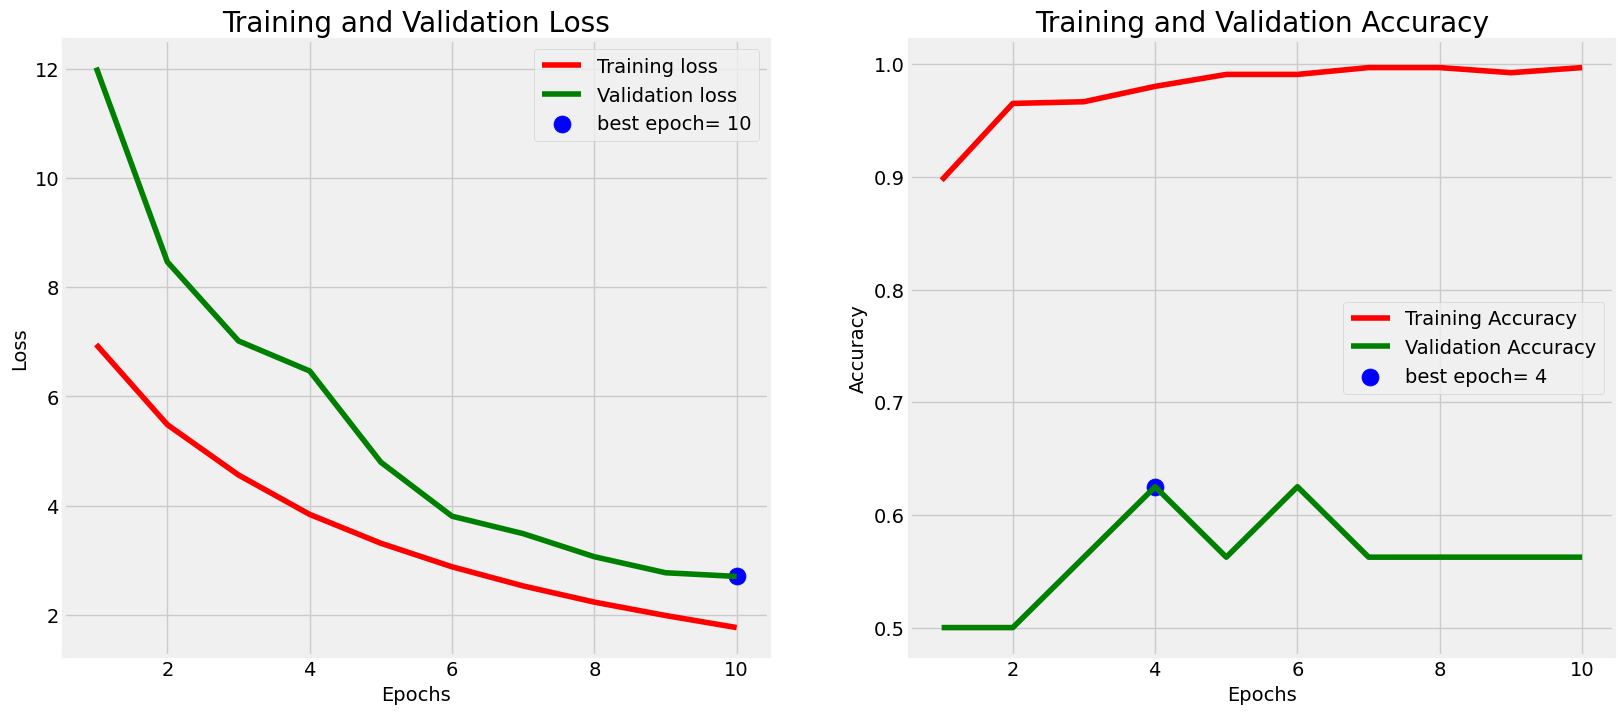

In [11]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss'] 
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

**Accessing History Data:**

- **history.history** contains the training history of the model, including metrics such as accuracy and loss recorded during training and validation epochs.
- **tr_acc, tr_loss, val_acc**, and **val_loss** extract the training and validation accuracy and loss from the history.history dictionary.

**Identifying Best Epoch:**

- **np.argmin(val_loss)** finds the index of the minimum validation loss, indicating the best epoch in terms of validation loss.
- **np.argmax(val_acc)** finds the index of the maximum validation accuracy, indicating the best epoch in terms of validation accuracy.

**Epochs:**

- Epochs creates a list representing the epochs from 1 to the total number of epochs.

- **Labels:**
- **loss_label** and **acc_label** generate labels indicating the best epochs for loss and accuracy, respectively.

**Plotting:**
**The code plots two subplots:**
- The first subplot shows the training and validation loss over epochs, highlighting the epoch with the lowest validation loss.
- The second subplot shows the training and validation accuracy over epochs, highlighting the epoch with the highest validation accuracy.

**Visualization:**

**plt.show()** displays the plots.
- This code helps visualize the training and validation performance of the model, highlighting the epochs with the best validation loss and accuracy.

<h3>TRAINING LOSS, VALIDATION LOSS AND EPOCH</h3>

**Training Loss:**

- **What is it?**: The training loss measures how well the CNN's predictions match the actual labels during training.
- **How is it calculated?**: It's computed using a loss function that **quantifies the difference between the predicted output and the actual labels** for the training images.
- **Why is it important?** The goal is to minimize the training loss by adjusting the CNN's internal parameters (like filters and weights) so that it gets better at making accurate predictions on the training data.


**Validation Loss:**

- **What is it?** The validation loss evaluates the CNN's performance on a separate dataset (validation set) that it hasn't seen during training.
- **How is it calculated?** Similar to training loss, but it's computed using the validation set instead of the training set.
- **Why is it important?** It helps us assess how well the CNN generalizes to new, unseen data. Increasing validation loss may indicate overfitting, where the CNN memorizes the training data rather than learning useful patterns.


**Best Epoch**

**What is it?** The best epoch is the point during training where the CNN achieves the lowest validation loss.

**How is it determined?** By monitoring the validation loss over multiple epochs and identifying the epoch with the lowest validation loss.

**Why is it important?** It indicates when the CNN has learned to generalize well to new data without overfitting. The model's parameters at the best epoch are often chosen for inference on new data.

In summary, during CNN training, we aim to minimize training loss by adjusting the model's parameters. We also monitor validation loss to ensure the CNN generalizes well to new data. The best epoch is where the CNN achieves the lowest validation loss, **indicating optimal performance**. These concepts are crucial for training CNNs effectively and ensuring they perform well on real-world tasks.

<h3>TRAINING AND VALIDATION ACCURACY</h3>

**1. Training Accuracy:**

   - Training accuracy measures the performance of the model on the training dataset during the training process.
   - It is calculated by comparing the model's predictions to the actual labels in the training dataset.
   - Training accuracy indicates how well the model has learned to fit the training data.
   - A high training accuracy suggests that the model is able to correctly classify or predict examples in the training data.
However, high training accuracy alone does not necessarily indicate good performance on new, unseen data.

**2. Validation Accuracy:**

   - Validation accuracy measures the performance of the model on a separate validation dataset that is not used for training.
   - It is calculated by **comparing the model's predictions to the actual labels** in the validation dataset.
   - Validation accuracy provides an estimate of how well the model is likely to perform on new, unseen data.
   - It helps in assessing the model's ability to generalize and avoid overfitting.
   - Overfitting occurs when the model performs well on the training data but poorly on new data.
   - Validation accuracy is crucial for evaluating the model's generalization performance and selecting the best model hyperparameters.

**3. Best Epoch:**

   - During the training process, the model is typically trained for multiple epochs, where each epoch represents one complete pass through the training dataset.
   - The best epoch refers to the epoch at which the model achieves the highest validation accuracy.
   - It is determined by monitoring the validation accuracy during training and selecting the epoch with the highest validation accuracy.
   - The model trained at the best epoch is usually considered the optimal model and is selected for deployment or further evaluation.
In summary, training accuracy measures the model's performance on the training data, validation accuracy measures its performance on a separate validation dataset, and the best epoch is the epoch at which the model achieves the highest validation accuracy. These metrics are essential for evaluating and selecting the best-performing model during the training process.

# 9. Model Evaluation

In [12]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

8/8 [==============================] - 13s 2s/step - loss: 3.7719 - accuracy: 0.2031
Train Loss:  1.6504579782485962
Train Accuracy:  1.0
--------------------
Validation Loss:  2.701725482940674
Validation Accuracy:  0.5625
--------------------
Test Loss:  3.771850824356079
Test Accuracy:  0.203125


The above code evaluate the performance of our model on **training, validation, and test datasets**. 
    
- **Calculate Length of Test Dataset (ts_length):** Determine the number of samples in the test dataset **(test_df)** by getting its length.

- **Calculate Test Batch Size (test_batch_size):** Compute the maximum batch size that can be used for the test dataset. It iterates over a range of numbers from 1 to the length of the test dataset (ts_length). For each number, it checks if the length of the test dataset is divisible by that number, the result is less than or equal to 80, and then selects the maximum value among those satisfying conditions. This is used to determine an appropriate batch size for evaluation.

- **Calculate Test Steps (test_steps):** Divide the length of the test dataset **(ts_length)** by the test batch size **(test_batch_size)** to determine the number of steps needed for evaluation.

**Evaluate the Model:**

- **Training Evaluation (train_score):** Evaluate the model's performance on the training dataset using the evaluate method, specifying the train_gen generator and the number of steps (test_steps). The results are stored in the train_score variable.
- **Validation Evaluation (valid_score):** Evaluate the model's performance on the validation dataset using the evaluate method, specifying the valid_gen generator and the number of steps (test_steps). The results are stored in the valid_score variable.
- **Test Evaluation (test_score):** Evaluate the model's performance on the test dataset using the evaluate method, specifying the **test_gen** generator and the number of steps **(test_steps)**. The results are stored in the **test_score** variable.

**Print Evaluation Metrics:**
- Print the training loss and accuracy.
- Print a separator line.
- Print the validation loss and accuracy.
- Print another separator line.
- Print the test loss and accuracy.
**This process provides insights into how well the model performs on the training, validation, and test datasets.**

In [13]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1) 

**Generate Predictions (preds):** 
   - Using the trained model (model), generate predictions for the test data generator (test_gen). 
**This step applies the trained model to the test dataset to obtain predictions for each input sample.**

- Find **Predicted Classes (y_pred):** The **np.argmax()** function from the NumPy library is used to find the indices of the maximum values along a specified axis **(axis=1)**. 
- In this context, it is applied to the predictions (preds) to find the class with the highest predicted probability for each sample. 
- The **axis=1** argument indicates that the maximum value is searched along the second axis, which corresponds to the predicted probabilities for each class. 
- As a result, **y_pred** contains the predicted class **labels** for each sample in the **test dataset.**

**further reading:** https://stackoverflow.com/questions/54167910/keras-how-to-use-argmax-for-predictions

# 10. Classification report

In [14]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       1.00      0.19      0.32       234
   PNEUMONIA       0.67      1.00      0.80       390

    accuracy                           0.70       624
   macro avg       0.84      0.60      0.56       624
weighted avg       0.80      0.70      0.62       624



The above code provided generates a **classification report**, which is a comprehensive summary of the performance of a classification model on a dataset. 

**classification_report():** This function generates a text report showing the main classification metrics. 

**It takes several parameters:**
**y_true:** The true target labels or ground truth.
**y_pred:** The predicted labels output by the classifier.
**target_names:** (Optional) List of display names matching the labels in y_true and y_pred.
**output_dict:** (Optional) If True, the report is returned as a dictionary, else it is returned as a string.
**test_gen.classes:** This represents the **true labels** of the test data, assuming **test_gen** is a data generator object containing the test data. It extracts the true class labels from the generator.

**y_pred:** This variable holds the predicted class labels generated by the classifier model.

**target_names=classes:** This parameter specifies the names associated with each **class label**. It's helpful for providing more meaningful names in the classification report.


The classification report includes **metrics** such as **precision**, **recall**, **F1-score**, and support for each class, providing insights into how well the model performs for different classes in the dataset.

<h2> 11. Summary of the classification report</h2>
The results shows the evaluation metrics of a classification model. 
 
**1. Precision:**

   - Precision measures the proportion of correctly predicted positive cases out of all instances predicted as positive.
          For the "NORMAL" class, the precision is 1.00, meaning that when the model predicts an instance as "NORMAL", it is  correct 100% of the time.
For the **"PNEUMONIA"** class, the precision is 0.70, indicating that when the model predicts an instance as "PNEUMONIA", it is correct 74% of the time.

**2. Recall (also known as Sensitivity):**

- Recall measures the proportion of correctly predicted positive cases out of all actual positive instances.
- For the "NORMAL" class, the recall is 0.30, meaning that the model correctly identifies 30% of all "NORMAL" cases.
- For the "PNEUMONIA" class, the recall is 1.00, indicating that the model correctly identifies all "PNEUMONIA" cases.


**3. F1-Score:**
**The F1-score is the harmonic mean of precision and recall**, providing a balanced measure of a model's performance.
- It considers both precision and recall and is useful when the classes are imbalanced.
- The F1-score ranges from 0 to 1, with higher values indicating better performance.
- For the "NORMAL" class, the F1-score is 0.46, and for the "PNEUMONIA" class, it is 0.83.
Support:

**4. Support** refers to the number of actual occurrences of each class in the dataset.
- In this case, there are **234 instances** of the **"NORMAL"** class and **390 instances** of the "PNEUMONIA" class.


**5. Accuracy:**
- Accuracy measures the proportion of correctly classified instances out of the total number of instances.
- The overall accuracy of the model is 0.74, indicating that it correctly predicts the class for 74% of the instances.
Macro Avg and Weighted Avg:

**6. Macro Avg** calculates the average of the metrics (precision, recall, F1-score) for each class without considering class imbalance.

**7. Weighted Avg** calculates the weighted average of the metrics, taking into account the support (number of instances) for each class.

These evaluation metrics provide a comprehensive overview of the model's performance for each class as well as its overall performance. They help in understanding how well the model is performing and identifying areas for improvement.






However, The overall accuracy of the model came out really good! With a **74% accuracy**. But during the tuning of our model I was more interested in the **recall** which is also know as the **sensitivity**. **Recall** means that all of the positive cases that we had we were able to predict **100% at pneumonia**. Which is awesome!! But looking at the normal we did well but not as well with only 30%. But this is okay because we’d rather and accurately tell people/patient that they have pneumonia and start treatment right away instead of misclassifying it and telling them they don’t have pneumonia when they do, and prolonging the treatment might make it worse.